In [41]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# mpl.rcParams['text.usetex'] = True
# mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']

# Conitnuous Measurements

In [42]:
df_pd = pd.read_csv('../data/h_gen_endoscopy_stored_views/exports/pairwise_distance.csv')
df_pd.time = df_pd.time.apply(lambda x: x - df_pd.time.iloc[0])
df_pd

,time,mean_pairwise_distance,std_pairwise_distance,n_matches
0,0.000,0.000000,0.000000,288
1,0.100,30.873274,13.768103,62
2,0.152,32.347107,14.139001,68
3,0.206,31.415579,14.559781,70
4,0.283,32.919144,15.366130,62
...,...,...,...,...
429,24.722,1.053517,0.721180,161
430,24.777,1.059244,0.599338,163
431,24.830,1.044876,0.611500,161
432,24.873,1.114143,0.871895,166


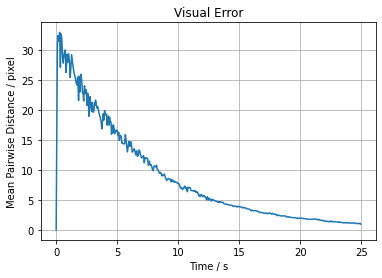

In [43]:
plt.plot(df_pd.time, df_pd.mean_pairwise_distance)
plt.title('Visual Error')
plt.xlabel('Time / s')
plt.ylabel('Mean Pairwise Distance / pixel')
plt.grid()
plt.show()
# plt.savefig('visual_error.pdf')

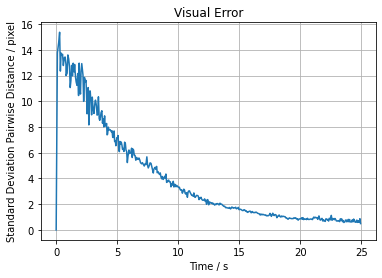

In [44]:
plt.plot(df_pd.time, df_pd.std_pairwise_distance)
plt.title('Visual Error')
plt.xlabel('Time / s')
plt.ylabel('Standard Deviation Pairwise Distance / pixel')
plt.grid()
plt.show()
# plt.savefig('visual_error.pdf')

In [45]:
df_fb = pd.read_csv('../data/h_gen_endoscopy_stored_views/exports/h_rcm_vs_feedback.csv')
df_fb.time = df_fb.time.apply(lambda x: x - df_fb.time.iloc[0])


# compute euclidean distance on trocar position error
df_fb['p_trocar_error_euclidean_distance'] = np.linalg.norm(
    np.array([df_fb['errors.p_trocar.position.x'], df_fb['errors.p_trocar.position.y'], df_fb['errors.p_trocar.position.z']])*1.e3, axis=0
)

df_fb

,time,states.task.values,states.p_trocar.position.x,states.p_trocar.position.y,states.p_trocar.position.z,errors.task.values,errors.p_trocar.position.x,errors.p_trocar.position.y,errors.p_trocar.position.z,p_trocar_error_euclidean_distance
0,0.00,"(0.0, 0.0, 0.0, 0.0)",0.843187,-0.056580,0.198011,"(0.0, 0.0, -0.010000000000000002, 0.0)",0.000025,-0.000388,-0.000357,0.527837
1,0.01,"(0.0, 0.0, 0.0, 0.0)",0.843187,-0.056321,0.198138,"(0.0, 0.0, -0.010000000000000002, 0.0)",0.000026,-0.000648,-0.000483,0.808223
2,0.02,"(0.0, 0.0, 0.0, 0.0)",0.843199,-0.056104,0.198151,"(0.0, 0.0, -0.010000000000000002, 0.0)",0.000014,-0.000864,-0.000496,0.996675
3,0.03,"(0.0, 0.0, 0.0, 0.0)",0.843216,-0.055910,0.198124,"(0.0, 0.0, -0.010000000000000002, 0.0)",-0.000003,-0.001059,-0.000470,1.158207
4,0.04,"(0.0, 0.0, 0.0, 0.0)",0.843233,-0.055732,0.198087,"(0.0, 0.0, -0.010000000000000002, 0.0)",-0.000020,-0.001237,-0.000432,1.310036
...,...,...,...,...,...,...,...,...,...,...
4007,61.46,"(0.0, 0.0, 0.0, 0.0)",0.843232,-0.056942,0.197626,"(-0.002670330655240818, -8.008918607349034e-05...",-0.000019,-0.000027,0.000029,0.043544
4008,61.47,"(0.0, 0.0, 0.0, 0.0)",0.843233,-0.056944,0.197624,"(-0.002670330655240818, -8.008918607349034e-05...",-0.000020,-0.000025,0.000031,0.044166
4009,61.48,"(0.0, 0.0, 0.0, 0.0)",0.843233,-0.056945,0.197624,"(-0.002670330655240818, -8.008918607349034e-05...",-0.000020,-0.000024,0.000031,0.043978
4010,61.49,"(0.0, 0.0, 0.0, 0.0)",0.843233,-0.056946,0.197624,"(-0.002670330655240818, -8.008918607349034e-05...",-0.000020,-0.000023,0.000031,0.043451


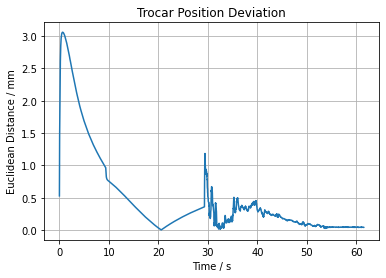

In [46]:
plt.plot(df_fb.time, df_fb.p_trocar_error_euclidean_distance)
plt.title('Trocar Position Deviation')
plt.xlabel('Time / s')
plt.ylabel('Euclidean Distance / mm')
plt.grid()
plt.show()
# plt.savefig('trocar_position_deviation.pdf')

In [47]:
df_twist = pd.read_csv('../data/h_gen_endoscopy_stored_views/exports/twist.csv')
df_twist.time = df_twist.time.apply(lambda x: x - df_twist.time[0])
df_twist

,time,linear.x,linear.y,linear.z,angular.x,angular.y,angular.z
0,0.000,0.0,0.0,0.000000,0.000000,-0.100000,0.000000
1,8.285,0.0,0.0,0.000000,0.000000,0.000000,0.000000
2,9.358,0.0,0.0,0.000000,0.000000,0.000000,-0.100000
3,26.492,0.0,0.0,0.000000,0.000000,0.000000,0.000000
4,29.301,0.0,0.0,-0.026621,0.004802,0.017821,0.221672
...,...,...,...,...,...,...,...
432,53.923,0.0,0.0,-0.002636,-0.000931,0.000808,0.006234
433,53.982,0.0,0.0,-0.002800,-0.001001,0.000855,0.006069
434,54.035,0.0,0.0,-0.002726,-0.001005,0.000815,0.005962
435,54.074,0.0,0.0,-0.002948,-0.001055,0.000904,0.005879


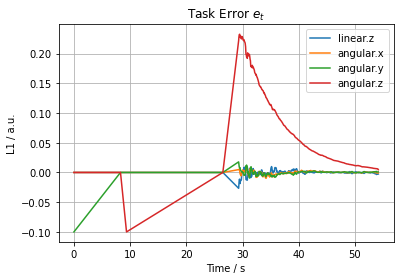

In [48]:
skip = [
    'time',
    'linear.x',
    'linear.y'
]

for key, col in df_twist.iteritems():
    if key in skip:
        continue
    plt.plot(df_twist.time, df_twist[key], label=key)

plt.title('Task Error $e_t$')
plt.xlabel('Time / s')
plt.ylabel('L1 / a.u.')
plt.grid()
plt.legend()
plt.show()
# plt.savefig('task_error.pdf')

No handles with labels found to put in legend.


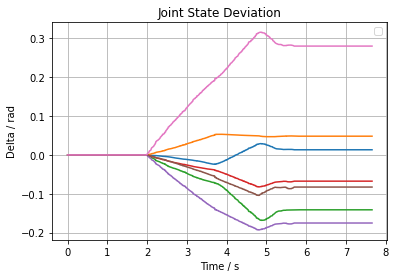

In [51]:
df_joint_state = pd.read_csv('../data/h_gen_endoscopy_stored_views/exports/joint_state.csv')
df_joint_state.time = df_joint_state.time.apply(lambda x: x - df_joint_state.time[0])


df_joint_state['JointState.position'] = df_joint_state['JointState.position'].apply(lambda x: np.array([float(xi) for xi in x.replace('(', '').replace(')', '').split(',')]))


for i in range(df_joint_state['JointState.position'].iloc[0].shape[0]):
    plt.plot(df_joint_state.time, df_joint_state['JointState.position'].apply(lambda x: x[i] - df_joint_state['JointState.position'].iloc[0][i]))

plt.title('Joint State Deviation')
plt.xlabel('Time / s')
plt.ylabel('Delta / rad')
plt.grid()
plt.legend()
plt.show()

# Episodic Measurements

No handles with labels found to put in legend.


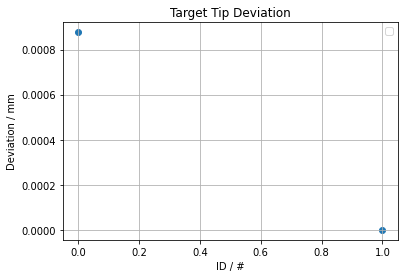

In [58]:
df_path = pd.read_csv('../data/h_gen_endoscopy_stored_views/exports/path_0.csv')
df_path.time = df_path.time.apply(lambda x: x - df_path.time[0])

# deviation target and final
df_path['target_rcm.task.values'] = df_path['target_rcm.task.values'].apply(lambda x: [float(xi) for xi in x.replace('(', '').replace(')', '').split(',')])
df_path['final_rcm.task.values'] = df_path['final_rcm.task.values'].apply(lambda x: [float(xi) for xi in x.replace('(', '').replace(')', '').split(',')])

# tip deviation
df_path['tip_euclidean_distance'] = df_path['target_rcm.task.values'].apply(lambda x: np.array(x[:-1])) - df_path['final_rcm.task.values'].apply(lambda x: np.array(x[:-1]))
df_path.tip_euclidean_distance = df_path.tip_euclidean_distance.apply(lambda x: np.linalg.norm(x))

# plot
plt.scatter(df_path.id, df_path.tip_euclidean_distance)
plt.title('Target Tip Deviation')
plt.xlabel('ID / #')
plt.ylabel('Deviation / mm')
plt.grid()
plt.legend()
plt.show()  # replace kinematics


No handles with labels found to put in legend.


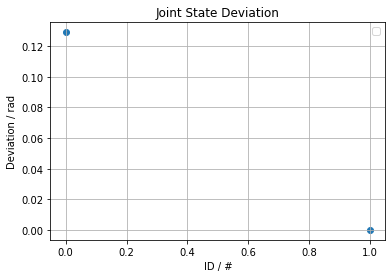

In [69]:
df_path = pd.read_csv('../data/h_gen_endoscopy_stored_views/exports/path_0.csv')
df_path.time = df_path.time.apply(lambda x: x - df_path.time[0])

df_path['target_joint_state.position']
# deviation initial and final
df_path['target_joint_state.position'] = df_path['target_joint_state.position'].apply(lambda x: np.array([float(xi) for xi in x.replace('(', '').replace(')', '').split(',')]))
df_path['final_joint_state.position'] = df_path['final_joint_state.position'].apply(lambda x: np.array([float(xi) for xi in x.replace('(', '').replace(')', '').split(',')]))

df_path['joint_state_euclidean_distance'] = df_path['target_joint_state.position'] - df_path['final_joint_state.position']
df_path.joint_state_euclidean_distance = df_path.joint_state_euclidean_distance.apply(lambda x: np.linalg.norm(x))

# plot
plt.scatter(df_path.id, df_path.joint_state_euclidean_distance)
plt.title('Joint State Deviation')
plt.xlabel('ID / #')
plt.ylabel('Deviation / rad')
plt.grid()
plt.legend()
plt.show()  # replace kinematics